In [1]:
import cv2
import numpy as np
import torch
import torchvision

In [4]:
coco_names = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', \
              'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 
              'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 
              'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella',
              'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
              'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
              'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
              'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
              'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
              'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
              'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
              'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase',
              'scissors', 'teddy bear', 'hair drier', 'toothbrush']
COLORS = np.random.uniform(0, 255, size=(len(coco_names), 3))

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Define input and output dimensions
input_dim = 50  # Dimensionality of input data
output_dim = 2  # Output dimension for binary classification (assuming 2 classes)

# Generate random input data
num_samples = 100  # Number of samples
input_data = np.random.rand(num_samples, input_dim)

# Convert input data to PyTorch tensor
input_data = torch.tensor(input_data, dtype=torch.float32)

# Binary classifier network definition
binary_classifier = nn.Sequential(
    nn.Linear(in_features=input_dim, out_features=512),
    nn.ReLU(),
    nn.Linear(in_features=512, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=output_dim)
)

# Forward pass to get activations
activations = []
def hook(module, input, output):
    activations.append(output)

# Register hook to record activations
binary_classifier.register_forward_hook(hook)

# Forward pass
output = binary_classifier(input_data)

# Choose the layer whose activations you want to visualize (e.g., second hidden layer)
layer_activations = activations[1]  # Change index based on your requirement

# Convert activations to numpy array
activation_np = layer_activations.detach().numpy()

# Generate heat map
plt.imshow(activation_np, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


IndexError: list index out of range

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True])


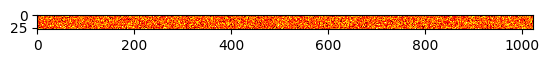

In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Define the binary classifier class
class BinaryClassifierRegionAbnormalV1(nn.Module):
    def __init__(self, input_dim=1024, output_dim=1):
        super().__init__()

        # Binary classifier network
        self.binary_classifier = nn.Sequential(
            nn.Linear(in_features=input_dim, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=output_dim)
        )

    def forward(self, region_features):
        logits = self.binary_classifier(region_features).squeeze(dim=-1)
        return logits

# Generate synthetic data for demonstration
num_regions = 29
input_dim = 1024

# Generate random features for regions
region_features = torch.randn(num_regions, input_dim)

# Initialize the binary classifier
classifier = BinaryClassifierRegionAbnormalV1(input_dim=input_dim)

# Forward pass through the binary classifier
logits = classifier(region_features)
predictions = torch.sigmoid(logits)

# Apply thresholding to classify regions as abnormal or normal
threshold = 0.5  # Adjust as needed
abnormal_regions = (predictions > threshold)
print(abnormal_regions)

# Generate heat map for abnormal regions
abnormal_indices = torch.nonzero(abnormal_regions).squeeze()
heat_map_data = region_features[abnormal_indices]

# Visualize heat map
plt.imshow(heat_map_data.numpy(), cmap='hot', interpolation='nearest')
# plt.colorbar()
plt.show()
